## ASSOCIATION RULES

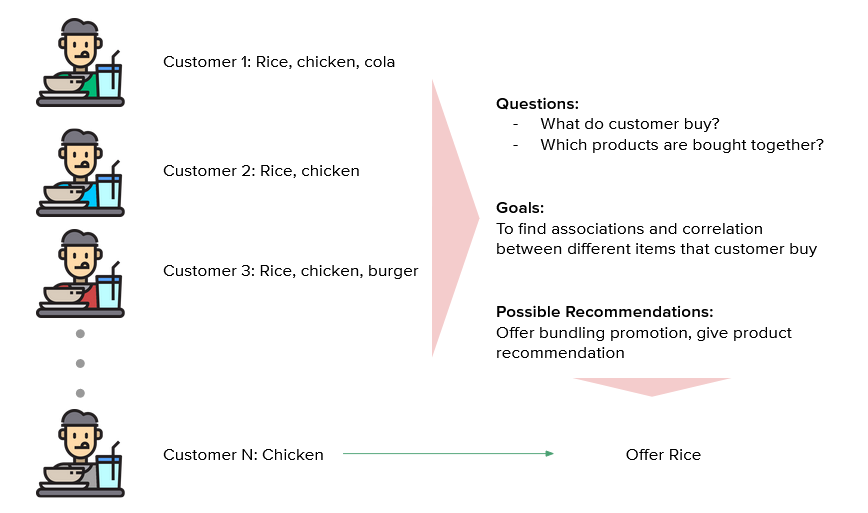

Measure 1: Support. This says how popular an itemset is, as measured by the proportion of transactions in which an itemset appears.

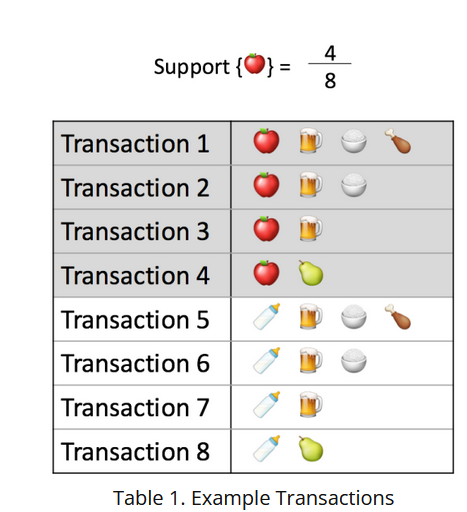

Measure 2: Confidence. This says how likely item Y is purchased when item X is purchased, expressed as {X -> Y}. This is measured by the proportion of transactions with item X, in which item Y also appears. In Table 1, the confidence of {apple -> beer} is 3 out of 4, or 75%.

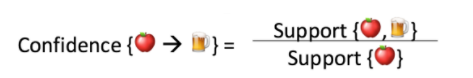



One drawback of the confidence measure is that it might misrepresent the importance of an association. This is because it only accounts for how popular apples are, but not beers. If beers are also very popular in general, there will be a higher chance that a transaction containing apples will also contain beers, thus inflating the confidence measure. To account for the base popularity of both constituent items, we use a third measure called lift.



Measure 3: Lift. This says how likely item Y is purchased when item X is purchased, while controlling for how popular item Y is. In Table 1, the lift of {apple -> beer} is 1,which implies no association between items. A lift value greater than 1 means that item Y is likely to be bought if item X is bought, while a value less than 1 means that item Y is unlikely to be bought if item X is bought.

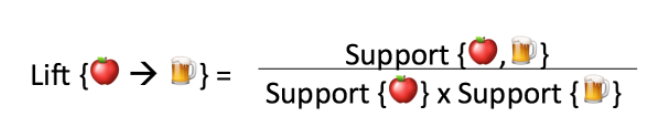

Source: https://www.kdnuggets.com/2016/04/association-rules-apriori-algorithm-tutorial.html

* Jadi, support untuk filter kombinasi kategori yang appears di transaksi per users
* Confidence untuk melihat how likely jika item X dibeli maka item Y juga dibeli
*  Lift untuk melihat how likely item Y dibeli jika item X dibeli dengan kontrol kepopuleran item Y. Filter di atas 1
* Jadi sort by confidence, dan filter lift > 1.

# Load Library

In [ ]:
# Import our modules
import pandas as pd
import numpy as np
pd.options.display.max_colwidth = 100

import warnings
warnings.filterwarnings("ignore")

# association rules
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Load Data

In [ ]:
# Run this only when you run the script using google colaboratory
from google.colab import drive
drive.mount('/content/drive')

import os
# adjust the path with your own google drive folder path
os.chdir("/content/drive/My Drive/Webinar/Big Data Analytics")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# download dataset https://www.kaggle.com/carrie1/ecommerce-data
dataset = pd.read_csv("ecommerce_data.csv",encoding= 'unicode_escape')
dataset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


# Data Preprocessing

In [ ]:
# filter and preprocess data
dataset = dataset.drop_duplicates()
customer_product = dataset[["CustomerID","Description"]].drop_duplicates()
customer_product["flag"] = 1
customer_product

,CustomerID,Description,flag
0,17850.0,WHITE HANGING HEART T-LIGHT HOLDER,1
1,17850.0,WHITE METAL LANTERN,1
2,17850.0,CREAM CUPID HEARTS COAT HANGER,1
3,17850.0,KNITTED UNION FLAG HOT WATER BOTTLE,1
4,17850.0,RED WOOLLY HOTTIE WHITE HEART.,1
...,...,...,...
541888,15804.0,ZINC T-LIGHT HOLDER STAR LARGE,1
541894,12680.0,CIRCUS PARADE LUNCH BOX,1
541904,12680.0,PACK OF 20 SPACEBOY NAPKINS,1
541907,12680.0,CHILDRENS CUTLERY CIRCUS PARADE,1


In [ ]:
# re-shape customer and product dataframe
customer_product = customer_product.pivot_table('flag', "CustomerID", 'Description')
customer_product = customer_product.replace(np.nan, 0)
customer_product = customer_product.astype("int64")
customer_product

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18281.0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
18282.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Association Rules

In [ ]:
# calculate support for each itemsets and filter min support = 0.05 (adjustable)
frequent_itemsets = apriori(customer_product, min_support=0.05, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.052836,(12 PENCILS SMALL TUBE RED RETROSPOT)
1,0.065874,(3 STRIPEY MICE FELTCRAFT)
2,0.059469,(4 TRADITIONAL SPINNING TOPS)
3,0.053751,(6 GIFT TAGS 50'S CHRISTMAS )
4,0.051921,(6 GIFT TAGS VINTAGE CHRISTMAS )
...,...,...
344,0.050320,"(LUNCH BAG PINK POLKADOT, LUNCH BAG BLACK SKULL., LUNCH BAG RED RETROSPOT)"
345,0.050778,"(LUNCH BAG CARS BLUE, LUNCH BAG PINK POLKADOT, LUNCH BAG RED RETROSPOT)"
346,0.050320,"(LUNCH BAG CARS BLUE, LUNCH BAG SPACEBOY DESIGN , LUNCH BAG RED RETROSPOT)"
347,0.053522,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER , REGENCY CAKESTAND 3 TIER)"


In [ ]:
# create association rule from frequent itemsets, filter lift = 1 and sort by confidence
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values("confidence",ascending=False).head(50)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
206,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER , REGENCY CAKESTAND 3 TIER)",(GREEN REGENCY TEACUP AND SAUCER),0.053522,0.089204,0.051693,0.965812,10.827000,0.046918,26.640782
168,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER )",(GREEN REGENCY TEACUP AND SAUCER),0.062443,0.089204,0.060156,0.963370,10.799624,0.054585,24.864730
163,"(PINK REGENCY TEACUP AND SAUCER, REGENCY CAKESTAND 3 TIER)",(GREEN REGENCY TEACUP AND SAUCER),0.059698,0.089204,0.056496,0.946360,10.608940,0.051171,16.979839
16,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.073422,0.089204,0.068161,0.928349,10.407029,0.061612,12.711544
205,"(PINK REGENCY TEACUP AND SAUCER, REGENCY CAKESTAND 3 TIER, GREEN REGENCY TEACUP AND SAUCER)",(ROSES REGENCY TEACUP AND SAUCER ),0.056496,0.097667,0.051693,0.914980,9.368364,0.046175,10.613155
199,"(PINK REGENCY TEACUP AND SAUCER, REGENCY CAKESTAND 3 TIER)",(ROSES REGENCY TEACUP AND SAUCER ),0.059698,0.097667,0.053522,0.896552,9.179682,0.047692,8.722553
169,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY TEACUP AND SAUCER)",(ROSES REGENCY TEACUP AND SAUCER ),0.068161,0.097667,0.060156,0.882550,9.036323,0.053498,7.682721
175,"(REGENCY CAKESTAND 3 TIER, GREEN REGENCY TEACUP AND SAUCER)",(ROSES REGENCY TEACUP AND SAUCER ),0.068618,0.097667,0.059927,0.873333,8.941952,0.053225,7.123682
210,"(PINK REGENCY TEACUP AND SAUCER, REGENCY CAKESTAND 3 TIER)","(ROSES REGENCY TEACUP AND SAUCER , GREEN REGENCY TEACUP AND SAUCER)",0.059698,0.074108,0.051693,0.865900,11.684310,0.047268,6.904509
207,"(REGENCY CAKESTAND 3 TIER, ROSES REGENCY TEACUP AND SAUCER , GREEN REGENCY TEACUP AND SAUCER)",(PINK REGENCY TEACUP AND SAUCER),0.059927,0.073422,0.051693,0.862595,11.748496,0.047293,6.743430
